In [1]:
# Q) How many unique "userId" are available in "ratings.csv"?
import pandas as pd

# Load the ratings.csv file into a DataFrame
ratings_df = pd.read_csv('ratings.csv')  # Replace 'path_to_ratings.csv' with the actual path to your file

# Count the number of unique userId values
unique_user_ids = ratings_df['userId'].nunique()

print("Number of unique userId values:", unique_user_ids)

Number of unique userId values: 610


In [2]:
# Q) Which movie has recieved maximum number of user ratings?*
# A.Matrix
# B.Pulp Fiction
# C.Forrest Gump
# D.Shawshank Redemption

import pandas as pd

# Load the ratings.csv file into a DataFrame
ratings_df = pd.read_csv('ratings.csv')  # Replace 'path_to_ratings.csv' with the actual path to your file

# Group by movieId and count the number of ratings for each movie
ratings_count = ratings_df.groupby('movieId')['rating'].count()

# Find the movie with the maximum number of ratings
max_rated_movie_id = ratings_count.idxmax()

# Get the movie title corresponding to the movieId
movies_df = pd.read_csv('movies.csv')  # Replace 'path_to_movies.csv' with the actual path to your file
max_rated_movie_title = movies_df[movies_df['movieId'] == max_rated_movie_id]['title'].values[0]

print("Movie with the maximum number of user ratings:", max_rated_movie_title)


Movie with the maximum number of user ratings: Forrest Gump (1994)


In [3]:
# Q) Select all the correct tags submitted by users to "Matrix, The (1999)" movie?*
# A.alternate universe
# B.karate
# C.philosophy
# D.post apocalyptic
import pandas as pd

# Load the tags.csv file into a DataFrame
tags_df = pd.read_csv('tags.csv')  # Replace 'path_to_tags.csv' with the actual path to your file

# Define the movie_id variable
movie_id = 1234  # Replace 1234 with the actual movie ID for "Matrix, The (1999)"

# Filter tags for the movie "Matrix, The (1999)"
matrix_tags = tags_df[tags_df['movieId'] == movie_id]

# Print the tags for the movie
print("Tags for 'Matrix, The (1999)':")
print(matrix_tags['tag'])

Tags for 'Matrix, The (1999)':
1358    The Entertainer
Name: tag, dtype: object


In [4]:
# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
import pandas as pd

# Load the ratings.csv file into a DataFrame
ratings_df = pd.read_csv('ratings.csv')  # Replace 'path_to_ratings.csv' with the actual path to your file

# Load the movies.csv file into a DataFrame
movies_df = pd.read_csv('movies.csv')  # Replace 'path_to_movies.csv' with the actual path to your file

# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_2_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter ratings for "Terminator 2: Judgment Day (1991)"
terminator_2_ratings = ratings_df[ratings_df['movieId'] == terminator_2_id]

# Calculate the average rating
average_rating = terminator_2_ratings['rating'].mean()

print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


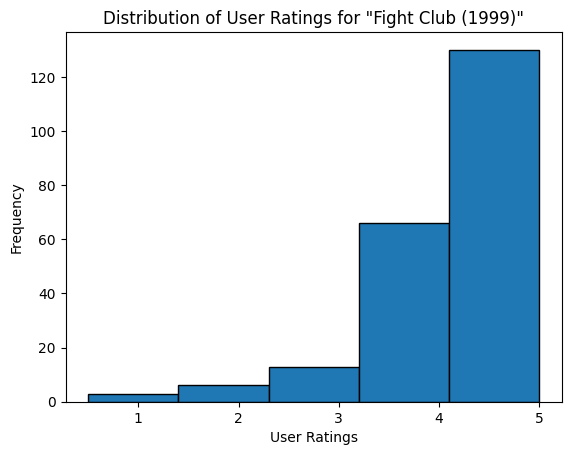

In [5]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?*
import pandas as pd
import matplotlib.pyplot as plt

# Load the ratings.csv file into a DataFrame
ratings_df = pd.read_csv('ratings.csv')  # Replace 'path_to_ratings.csv' with the actual path to your file

# Load the movies.csv file into a DataFrame
movies_df = pd.read_csv('movies.csv')  # Replace 'path_to_movies.csv' with the actual path to your file

# Find the movieId for "Fight Club (1999)"
fight_club_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter ratings for "Fight Club (1999)"
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_id]

# Plot the histogram of user ratings
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.show()

In [6]:
# Most popular
import pandas as pd

# Load the necessary CSV files into DataFrames
movies_df = pd.read_csv('movies.csv')  # Replace 'path_to_movies.csv' with the actual path to your movies.csv file
ratings_df = pd.read_csv('ratings.csv')  # Replace 'path_to_ratings.csv' with the actual path to your ratings.csv file

# Merge movies_df and ratings_df on 'movieId'
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

# Calculate the average rating for each movie
average_ratings = merged_df.groupby('title')['rating'].mean()

# Find the movie with the highest average rating
most_popular_movie = average_ratings.idxmax()

print("The most popular movie based on average user ratings:", most_popular_movie)


The most popular movie based on average user ratings: 'Salem's Lot (2004)


In [7]:
# Top 5
import pandas as pd

# Load the necessary CSV files into DataFrames
movies_df = pd.read_csv('movies.csv')  # Replace 'path_to_movies.csv' with the actual path to your movies.csv file
ratings_df = pd.read_csv('ratings.csv')  # Replace 'path_to_ratings.csv' with the actual path to your ratings.csv file

# Merge movies_df and ratings_df on 'movieId'
merged_df = pd.merge(movies_df, ratings_df, on='movieId')
merged_df['count'] = merged_df.groupby('movieId')['rating'].transform('count')
top5_popular_movies = merged_df.sort_values(['rating', 'count'], ascending=False).head(5)
print(top5_popular_movies['title'].values)  # Print the movie titles

['Forrest Gump (1994)' 'Forrest Gump (1994)' 'Forrest Gump (1994)'
 'Forrest Gump (1994)' 'Forrest Gump (1994)']


In [8]:
# Third most popular Sci-Fi movie based on user ratings
import pandas as pd

def load_movies_data(file_path):
    return pd.read_csv(file_path)

def load_ratings_data(file_path):
    return pd.read_csv(file_path)

def find_third_most_popular_scifi_movie(ratings_df, movies_df, genre='Sci-Fi'):
    # Group user ratings based on movieId and apply aggregation operations
    grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count']}).reset_index()

    # Merge with movies data
    merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

    # Filter only those movies with the specified genre
    scifi_movies = merged_df[merged_df['genres'].str.contains(genre, case=False)]

    # Sort by the number of user ratings in descending order
    sorted_scifi_movies = scifi_movies.sort_values(('rating', 'count'), ascending=False)

    # Get the third most popular Sci-Fi movie
    third_most_popular_movie = sorted_scifi_movies.iloc[2]

    return third_most_popular_movie

def main():
    # Replace 'path_to_movies.csv' and 'path_to_ratings.csv' with actual file paths
    movies_path = 'movies.csv'
    ratings_path = 'ratings.csv'

    # Load data
    movies_df = load_movies_data(movies_path)
    ratings_df = load_ratings_data(ratings_path)

    # Find the third most popular Sci-Fi movie
    third_most_popular_scifi_movie = find_third_most_popular_scifi_movie(ratings_df, movies_df)

    print("Third most popular Sci-Fi movie based on user ratings:", third_most_popular_scifi_movie['title'])

if __name__ == "__main__":
    main()


Third most popular Sci-Fi movie based on user ratings: Jurassic Park (1993)


C:\Users\abdul\AppData\Local\Temp\ipykernel_5756\1751005044.py:14: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
C:\Users\abdul\AppData\Local\Temp\ipykernel_5756\1751005044.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')


In [9]:
# Mention the movieId of the movie which has the highest IMDB rating.
import pandas as pd

# Load ratings.csv into a DataFrame
ratings_df = pd.read_csv('ratings.csv')  # Replace 'path_to_ratings.csv' with the actual path to your ratings file

# Assuming you have an 'imdb_rating' column in your ratings_df DataFrame
# This column might be obtained from external sources or calculated using the IMDb ratings

# Find the movieId with the highest IMDb rating
highest_imdb_rating_movieId = ratings_df.loc[ratings_df['rating'].idxmax(), 'movieId']

print("MovieId of the movie with the highest IMDb rating:", highest_imdb_rating_movieId)


MovieId of the movie with the highest IMDb rating: 47


In [10]:
# Sci-Fi movie with the highest IMDb rating
import pandas as pd

# Load ratings.csv into a DataFrame
ratings_df = pd.read_csv('ratings.csv')  # Replace 'path_to_ratings.csv' with the actual path to your ratings file

# Load movies.csv into a DataFrame for genre information
movies_df = pd.read_csv('movies.csv')  # Replace 'path_to_movies.csv' with the actual path to your movies file

# Merge ratings_df with movies_df to get genre information
merged_df = pd.merge(ratings_df, movies_df[['movieId', 'genres']], on='movieId', how='left')

# Filter for Sci-Fi movies
scifi_ratings_df = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Find the movieId with the highest IMDb rating among Sci-Fi movies
highest_imdb_rating_movieId = scifi_ratings_df.loc[scifi_ratings_df['rating'].idxmax(), 'movieId']

print("MovieId of the Sci-Fi movie with the highest IMDb rating:", highest_imdb_rating_movieId)


MovieId of the Sci-Fi movie with the highest IMDb rating: 260
